# wine data 
## 소개 :  
These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from **three** different cultivars.
     
 The analysis determined the quantities of **13 constituents** found in each of the **three types** of wines. 

 

In [ ]:
# Importing common libraries
import pandas as pd
from pandas import DataFrame
from pandas import Series
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
# csv 파일 불러오기
import pandas as pd
wine=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/'
                     'wine/wine.data',header=None)
wine.columns = ['class label', 'alchohol', 'malic acid', 'ash', 
                    'alcalinity of ash', 'magnesium', 'total phenols', 
                    'flavanoids', 'nonflavanoid phenols', 
                    'proanthocyanins', 'color intensity', 'hue', 
                    'OD280', 'proline']  # Column names
# View of top 5 observations
wine.head()

,class label,alchohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD280,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
import numpy as np
print('class label:', np.unique(wine['class label']))  # Class 출력

class label: [1 2 3]


#전처리 및 EDA

- class label : 1,2,3
- missing values : X


In [ ]:
# 와인 타입 종류
import pandas as pd
print(pd.unique(wine['class label']))

[1 2 3]


In [ ]:
# 데이터 탐색 : null 값 없음
wine.shape
wine.info()
wine.isna().any()

In [ ]:
# Check the missing value
np.sum(pd.isnull(wine))

class label             0
alchohol                0
malic acid              0
ash                     0
alcalinity of ash       0
magnesium               0
total phenols           0
flavanoids              0
nonflavanoid phenols    0
proanthocyanins         0
color intensity         0
hue                     0
OD280                   0
proline                 0
dtype: int64

In [ ]:
# describe 둘러보기
wine.describe()

,class label,alchohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD280,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### 와인 타입 별 비교

In [ ]:
# 와인 타입별 크기 : type 1 59개 / type 2 71개 / type 3 48개
wine_com = wine.groupby("class label")
wine_com.size()


class label
1    59
2    71
3    48
dtype: int64

In [ ]:
# 와인 타입별 비교
wine_type1 = wine[wine["class label"]==1]
wine_type2 = wine[wine["class label"]==2]
wine_type3 = wine[wine["class label"]==3]

In [ ]:
wine_comparison = wine.groupby(['class label']).mean()
print(wine_comparison)

wine.groupby(wine['class label']).mean()

              alchohol  malic acid       ash  ...       hue     OD280      proline
class label                                   ...                                 
1            13.744746    2.010678  2.455593  ...  1.062034  3.157797  1115.711864
2            12.278732    1.932676  2.244789  ...  1.056282  2.785352   519.507042
3            13.153750    3.333750  2.437083  ...  0.682708  1.683542   629.895833

[3 rows x 13 columns]


,alchohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD280,proline
class label,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


###Visualizing 

-  kernel density를 이용한 그래프
- seaborn package -  kdeplot, displot

In [ ]:
from sklearn.neighbors import KernelDensity
import seaborn as sns 
import matplotlib.pyplot as plt

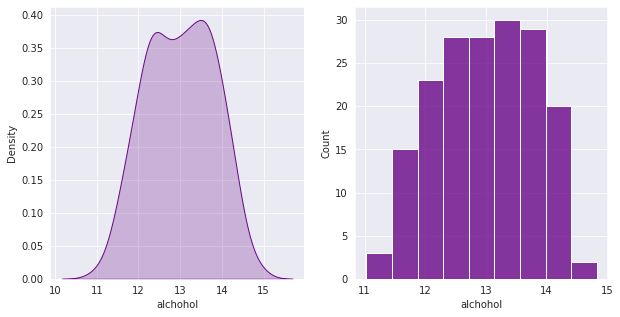

In [ ]:
#kdeplot
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
plt.subplot(121)
sns.kdeplot(wine['alchohol'],shade=True,color='#6A0888')
plt.subplot(122)
sns.histplot(wine['alchohol'],color='#6A0888',alpha=0.8)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


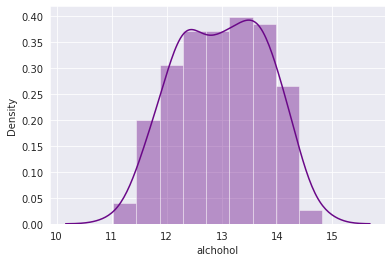

In [ ]:
# distplot
import seaborn as sns
sns.distplot(wine['alchohol'], color='#6A0888',kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


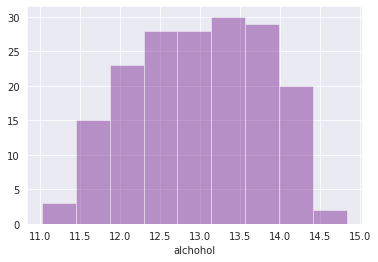

In [ ]:
# only 히스토그램
sns.distplot(wine['alchohol'], color= '#6A0888', kde=False)

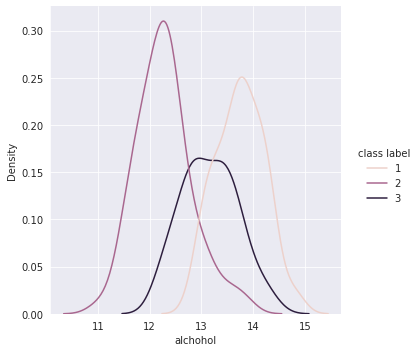

In [ ]:
# 와인 타입 별
import seaborn as sns
sns.displot(wine, x="alchohol", hue="class label", kind="kde")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


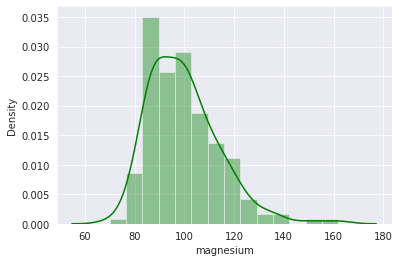

In [ ]:
sns.distplot(wine['magnesium'],color='green',kde=True)

In [ ]:
y = wine.values[:,0]

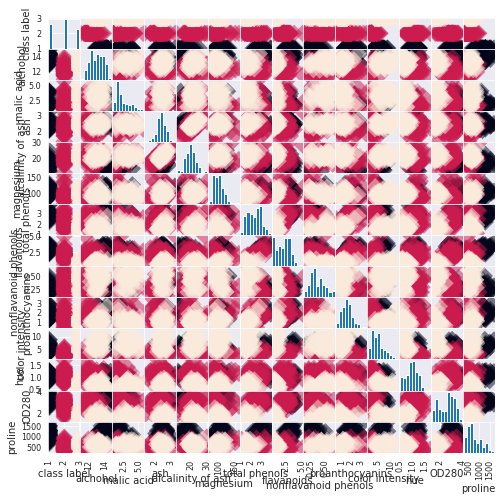

In [ ]:
_ = pd.plotting.scatter_matrix(wine, c= y, figsize = [8,8], s=150,  marker='D')

# input 데이터 , target 데이터

In [ ]:
# wine_input 
wine_input = wine[['alchohol','malic acid',	'ash','alcalinity of ash','magnesium','total phenols','flavanoids',	'nonflavanoid phenols',	'proanthocyanins',	'color intensity',	'hue',	'OD280',	'proline']]
print(wine_input[:5])

   alchohol  malic acid   ash  ...   hue  OD280  proline
0     14.23        1.71  2.43  ...  1.04   3.92     1065
1     13.20        1.78  2.14  ...  1.05   3.40     1050
2     13.16        2.36  2.67  ...  1.03   3.17     1185
3     14.37        1.95  2.50  ...  0.86   3.45     1480
4     13.24        2.59  2.87  ...  1.04   2.93      735

[5 rows x 13 columns]


In [ ]:
# 넘파이 배열로 바꿈
wine_input = wine[['alchohol','malic acid',	'ash','alcalinity of ash','magnesium','total phenols','flavanoids',	'nonflavanoid phenols',	'proanthocyanins',	'color intensity',	'hue',	'OD280',	'proline']].to_numpy()
print(wine_input[:5])

In [ ]:
# wine_target
wine_target = wine['class label'].to_numpy()

# Train / Test set 

In [ ]:
from sklearn.model_selection import  train_test_split
train_input, test_input, train_target, test_target = train_test_split(wine_input, wine_target,  test_size = 0.3, stratify = wine_target,  random_state=123)
print(train_target.shape, test_target.shape) # 훈련 데이터는 124개 , 테스트 데이터 54개 (7:3 비율)
print(test_target)

(124,) (54,)
[1 1 1 2 1 1 1 2 3 2 2 2 3 2 3 3 3 1 2 3 2 1 2 3 1 3 2 2 1 3 2 2 3 1 1 1 1
 2 3 2 1 3 2 3 1 2 2 2 1 3 1 2 2 3]


 # Logistic Regression
 ### multi_class=’ovr /‘multinomial 적용

In [ ]:
# multi_class = 'auto' (default)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000)
lr.fit(train_input, train_target)

# 과대 적합 / 과소적합 아님
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

1.0
0.9629629629629629


In [ ]:
# multi_class = 'ovr' 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1, multi_class='ovr',max_iter=10000)
model.fit(train_input, train_target)
print('학습결과 :', model.score(train_input, train_target))
print('테스트결과 :', model.score(test_input, test_target))

학습결과 : 0.9919354838709677
테스트결과 : 0.9629629629629629


In [ ]:
#multinomial
model2 = LogisticRegression(C=1, multi_class='multinomial',max_iter=10000,solver='lbfgs')
model2.fit(train_input, train_target)
print('학습결과 :', model2.score(train_input, train_target))
print('테스트결과 :', model2.score(test_input, test_target))

학습결과 : 1.0
테스트결과 : 0.9629629629629629


### standardscaler 로 스케일링 다시 !

In [ ]:
#사이킷런의 standard scaler 를 통해 훈련세트와 테스트 세트 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine)

X_train, X_test, y_train, y_test = train_test_split(wine_scaled,wine_target, test_size = 0.3, random_state=123)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

lr_clf = LogisticRegression(multi_class='ovr',random_state=42)
lr_clf.fit(X_train,y_train)
lr_preds = lr_clf.predict(X_test)

print('accuracy : {:0.3f}'.format(accuracy_score(y_test,lr_preds)))
print(classification_report(y_test,lr_preds))

accuracy : 0.981
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       0.95      1.00      0.97        18
           3       1.00      0.95      0.98        22

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [ ]:
lr_clf_mn = LogisticRegression(multi_class='multinomial',solver='lbfgs',random_state=42)
lr_clf_mn.fit(X_train,y_train)
lr_preds_mn = lr_clf_mn.predict(X_test)

print('accuracy : {:0.3f}'.format(accuracy_score(y_test,lr_preds_mn)))
print(classification_report(y_test,lr_preds_mn))


accuracy : 0.981
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       0.95      1.00      0.97        18
           3       1.00      0.95      0.98        22

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



multi_class = 'ovr' 일 때보다 multi_class = 'multinomial'을 적용시킨 모델의 결과가 더 좋다.

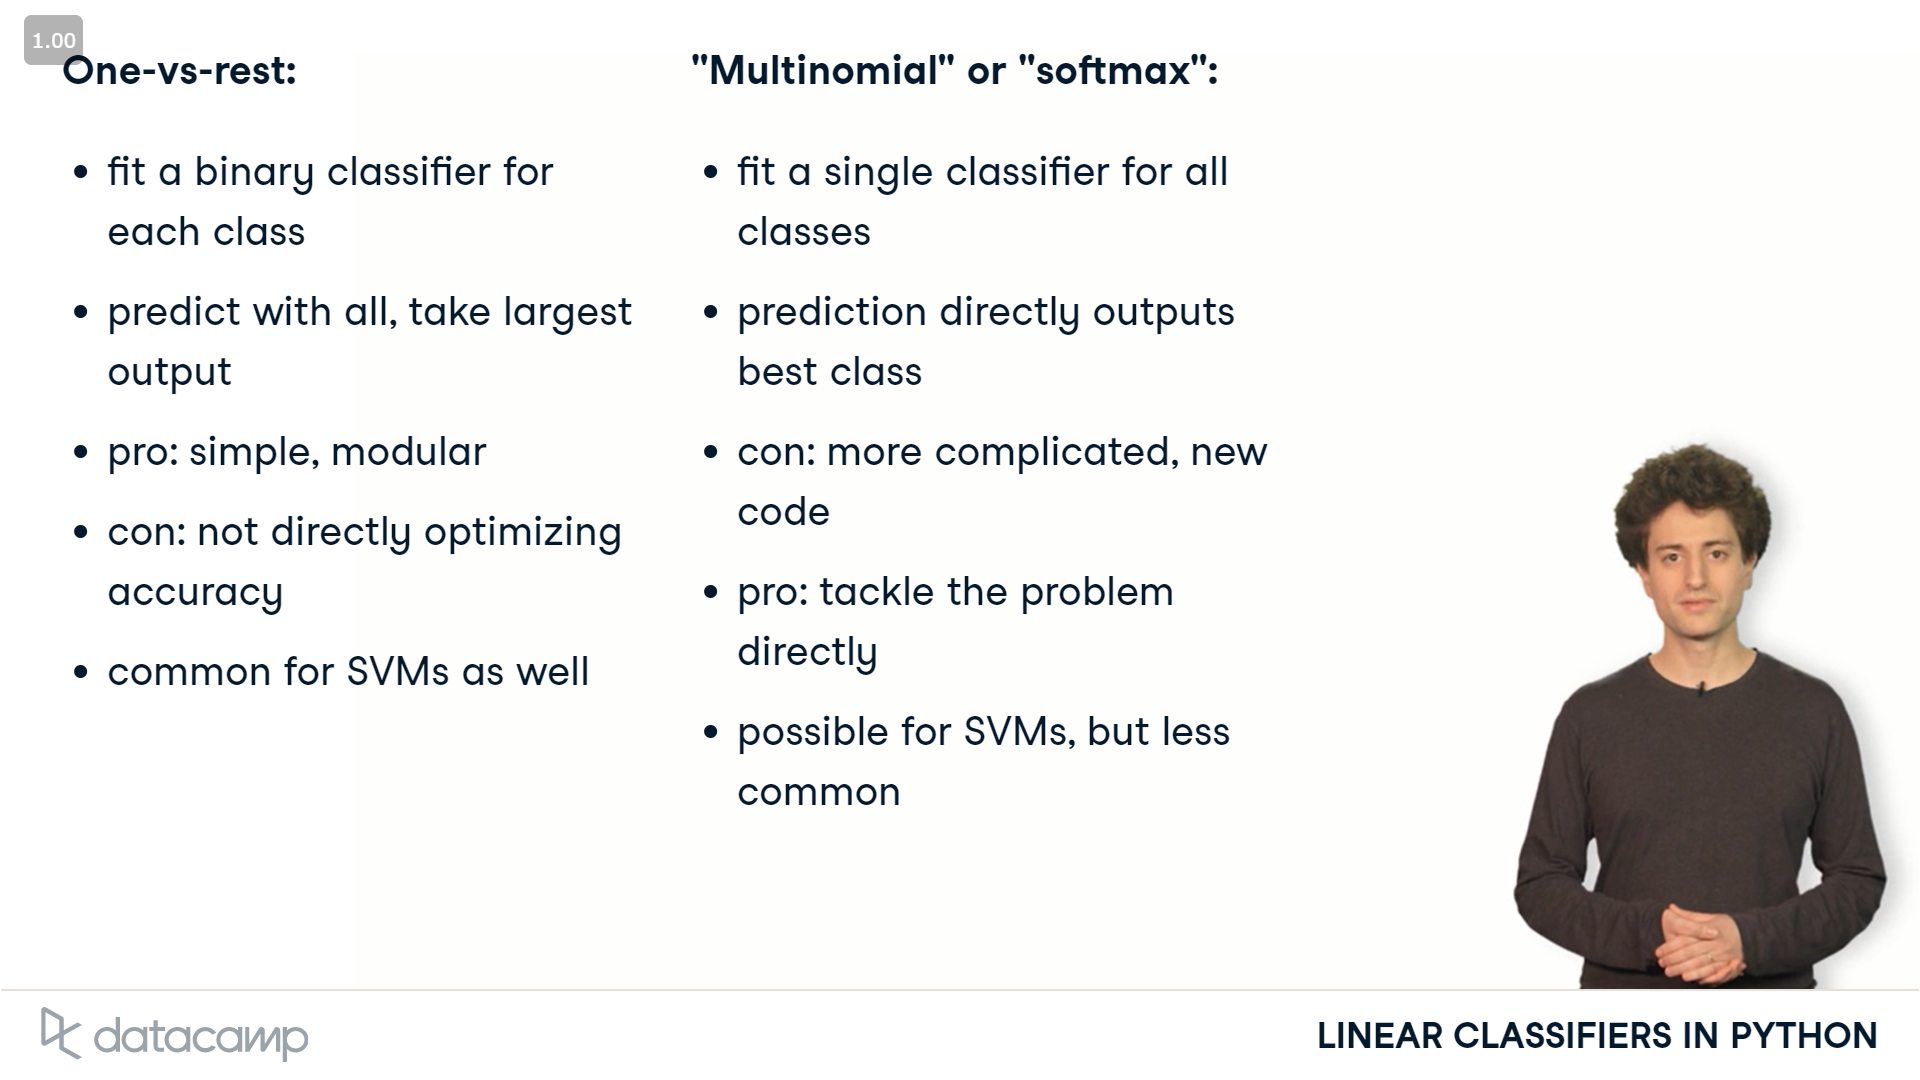